<a href="https://colab.research.google.com/github/hpink97/tensorflow_keras_practice/blob/main/IMBD_review_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of IMBD movie reviews using Dense neural networks** 
- 50,000 (25k test & 25k train) text reviews for movies
- labelled as positive (1) or negative (0)
- Use a Dense-layer neural network to classify
---



In [1]:
## Load libraries
import numpy as np
import matplotlib.pyplot as plt
import gc #garbage collection needed to save RAM



from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [2]:
## total dataset include over 80,000 words
## many only appear once and are uninformative for the model
## use top 8,000 most frequent words for model here
n_words = 8000
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=n_words)

### data encodes a list of word indicies, showing the sequence of specific words in the review

In [3]:
train_data.shape


(25000,)

In [4]:
train_data[69][:20]

[1,
 48,
 335,
 6,
 337,
 7,
 22,
 1359,
 5,
 104,
 36,
 92,
 97,
 4403,
 40,
 36,
 343,
 8,
 133,
 9]

### convert index sequence back to words to read review 
- review 69 shown here
- label data shows that the review is labelled as positive


In [5]:
word2index = imdb.get_word_index()
index2word = dict(
    [(value, key) for (key, value) in word2index.items()]
)

##indices 1-3 are used for padding start of sequence and unknown words 
## words not in most frequent 5000 that we pulled data for
review_69 = " ".join([index2word.get(i -3, '?') for i in train_data[69]])
print(review_69)
print(train_labels[69])

? if you're a fan of film noir and think they don't make 'em like they used to here is your answer they just don't make 'em in hollywood anymore we must turn to the french to remember how satisfying subtle and terrific a well made film from that genre can be read my lips is a wonderfully nasty little gift to the faithful from director jacques ? featuring sharp storytelling and fine performances from ? ? and vincent ? br br the basic plot could have been written in the 40's dumb but appealing ex con and a smart but ? femme fatale who turns out to be ? ambitious discover each other while living lives of bleak desperation and longing ? each other to meet their own ends develop complex love hate relationship cook up criminal scheme involving heist double crosses close calls and lots of money all action takes place in depressing seedy and or poorly lit locations br br ? has fashioned some modern twists of course the femme fatale is an ? office worker who happens to be nearly deaf and uses h

### Use multi-hot enoding to standaradise imput format
- lengths of reviews are all different
- our neural network will require the input tensor to be of the same size
- we generate vectorised sequences which are binary (1's where the word exists)
- this does however lose ordering (we're just saying whether a word exists in the review

In [6]:
def multi_hot_enoding(sequences):
  x = np.zeros((len(sequences), n_words))
  for i, seq in enumerate(sequences):
    for j in seq:
      x[i,j] = 1
  return x


x_train = multi_hot_enoding(train_data)
x_test = multi_hot_enoding(test_data)

del train_data
gc.collect()
x_train[69]


array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
### convert labels to vectors also 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build the neural network 

In [8]:
#build neural net classifier
# use simple dense layers

layer_size = 16

review_clf = keras.Sequential([
    layers.Dense(layer_size, activation='relu'),
    #layers.Dense(layer_size-2, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

review_clf2 = keras.models.clone_model(review_clf)


review_clf.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)

review_clf2.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)





In [9]:
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.35, random_state=7)

print(f"{partial_x_train.shape[0]} training samples, {x_val.shape[0]} validation samples and {y_test.shape[0]} test samples")

16250 training samples, 8750 validation samples and 25000 test samples


In [10]:
model_epochs=[50,5]

train_history_full = review_clf.fit(partial_x_train, partial_y_train, 
                                    epochs =model_epochs[0], batch_size = 500, 
                                    validation_data =(x_val, y_val))
gc.collect()


Epoch 1/50
33/33 [==============================] - 3s 35ms/step - loss: 0.5419 - accuracy: 0.7756 - val_loss: 0.4046 - val_accuracy: 0.8575
Epoch 2/50
33/33 [==============================] - 0s 15ms/step - loss: 0.3267 - accuracy: 0.8938 - val_loss: 0.3190 - val_accuracy: 0.8799
Epoch 3/50
33/33 [==============================] - 0s 15ms/step - loss: 0.2502 - accuracy: 0.9190 - val_loss: 0.2905 - val_accuracy: 0.8883
Epoch 4/50
33/33 [==============================] - 0s 15ms/step - loss: 0.2086 - accuracy: 0.9350 - val_loss: 0.2793 - val_accuracy: 0.8902
Epoch 5/50
33/33 [==============================] - 0s 15ms/step - loss: 0.1802 - accuracy: 0.9442 - val_loss: 0.2767 - val_accuracy: 0.8891
Epoch 6/50
33/33 [==============================] - 0s 15ms/step - loss: 0.1585 - accuracy: 0.9527 - val_loss: 0.2818 - val_accuracy: 0.8872
Epoch 7/50
33/33 [==============================] - 0s 15ms/step - loss: 0.1408 - accuracy: 0.9589 - val_loss: 0.2824 - val_accuracy: 0.8877
Epoch 8/50
33

1402

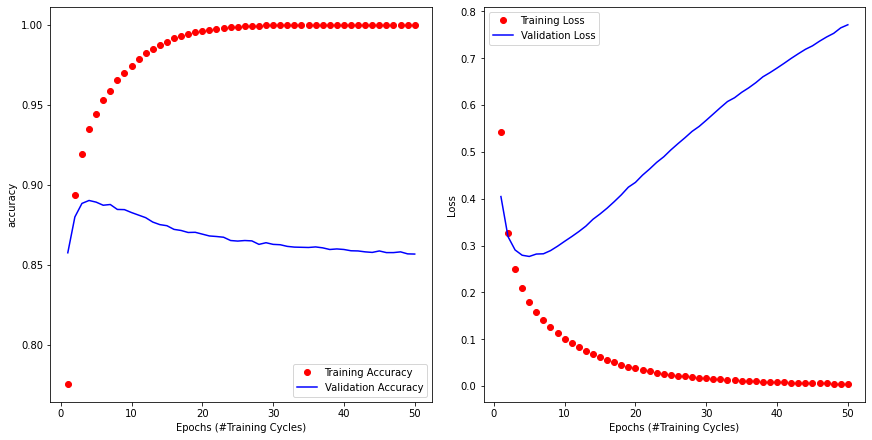

In [11]:
##plot 
plt.rcParams['figure.figsize'] = [12, 6]
train_stats = train_history_full.history
train_acc = train_stats['accuracy']
val_acc = train_stats['val_accuracy']
train_loss = train_stats['loss']
val_loss = train_stats['val_loss']
epochs = range(1, len(val_acc)+1)


axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=False))

axs[0].plot(epochs, train_acc, 'ro',
         label='Training Accuracy',)
axs[0].plot(epochs, val_acc, 'b',
         label = 'Validation Accuracy')
axs[0].set_xlabel('Epochs (#Training Cycles)')
axs[0].set_ylabel('accuracy')
axs[0].legend()


axs[1].plot(epochs, train_loss, 'ro',
         label='Training Loss',)
axs[1].plot(epochs, val_loss, 'b',
         label = 'Validation Loss')
axs[1].set_xlabel('Epochs (#Training Cycles)')
axs[1].set_ylabel('Loss')
axs[1].legend()
plt.show()


In [12]:
review_clf2.fit(partial_x_train, partial_y_train,
                epochs =model_epochs[1], batch_size = 500, 
                validation_data =(x_val, y_val))
gc.collect()

Epoch 1/5
33/33 [==============================] - 1s 28ms/step - loss: 0.5260 - accuracy: 0.7790 - val_loss: 0.3892 - val_accuracy: 0.8591
Epoch 2/5
33/33 [==============================] - 0s 15ms/step - loss: 0.3122 - accuracy: 0.8969 - val_loss: 0.3103 - val_accuracy: 0.8803
Epoch 3/5
33/33 [==============================] - 0s 15ms/step - loss: 0.2373 - accuracy: 0.9234 - val_loss: 0.2846 - val_accuracy: 0.8894
Epoch 4/5
33/33 [==============================] - 0s 15ms/step - loss: 0.1956 - accuracy: 0.9393 - val_loss: 0.2782 - val_accuracy: 0.8901
Epoch 5/5
33/33 [==============================] - 0s 14ms/step - loss: 0.1680 - accuracy: 0.9492 - val_loss: 0.2768 - val_accuracy: 0.8874


1440

# Assess model accuracy on **test data**
- we achieve 88.2% accuracy (not too bad) 
- we can see that the model which undergoes many training cycles (epochs) has become overfit (only 84% accuracy)

In [13]:
gc.collect()
model_results = review_clf.evaluate(x_test, y_test)
loss = model_results[0]
accuracy = model_results[1]*100
print(f"Neural Network IMDB review classifier trained on {n_words} unique words with 30 epochs. Achieving {accuracy:.1f}% accuracy and a loss of {loss:.2f}")

gc.collect()
model_results = review_clf2.evaluate(x_test, y_test)
loss2 = model_results[0]
accuracy2 = model_results[1]*100
print(f"Neural Network IMDB review classifier trained on {n_words} unique words with 5 epochs. Achieving {accuracy2:.1f}% accuracy and a loss of {loss2:.2f}")



782/782 [==============================] - 2s 3ms/step - loss: 0.8173 - accuracy: 0.8472
Neural Network IMDB review classifier trained on 8000 unique words with 30 epochs. Achieving 84.7% accuracy and a loss of 0.82
782/782 [==============================] - 2s 3ms/step - loss: 0.2952 - accuracy: 0.8800
Neural Network IMDB review classifier trained on 8000 unique words with 5 epochs. Achieving 88.0% accuracy and a loss of 0.30


### assess the models prediction confidence

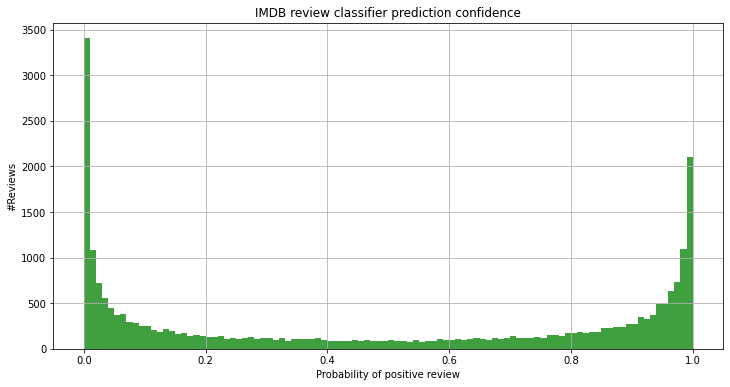

In [14]:
gc.collect()
y_pred = review_clf2.predict(x_test)


n, bins, patches = plt.hist(y_pred, 100, density=False, facecolor='g', alpha=0.75)


plt.xlabel('Probability of positive review')
plt.ylabel('#Reviews')
plt.title('IMDB review classifier prediction confidence')
plt.grid(True)
plt.show()

In [15]:


test = y_pred == np.min(y_pred)
ind = [i for i, x in enumerate(test) if x]
most_negative_review = test_data[ind[0]]
" ".join([index2word.get(i -3, '?') for i in most_negative_review])

"? ? or creatures from the ? as i'm positive it's more ? known as filmed under as the title creatures from the ? appears over a moving image in the same ? type as the rest of the credits starts with five 20 something kids mike clay rogers his girlfriend margaret sharon sisters julie ann wolf dorothy ? an annoying idiot named bobby michael ? whom decide to all fit into a small rubber boat head out to sea don't ask why as i don't know oh the complete idiot bobby left the ? behind never thought to tell anyone so it comes as no great surprise that they end up stranded out at sea without any ? for the ? to make matters worse they become trapped in a thunder storm discover a dead body floating in the water shortly after their luck seems to change when they come across a ? potential safety in a flash everyone ? the ? begin to explore first of all they find a scientific lab with various fish ? computer equipment then down below they find fully ? ? ? they find a ? ? ? who appears mad can't talk

In [16]:


test = y_pred == np.max(y_pred)
ind = [i for i, x in enumerate(test) if x]
most_positive_review = test_data[ind[0]]
" ".join([index2word.get(i -3, '?') for i in most_positive_review])

"? looking back at the career of alfred hitchcock it never fails to be surprising how such a brilliant and ? man could be ? sufficient recognition for how revolutionary he was for the film industry it is likely a sign of how ahead of his time hitchcock was always attempting to push the ? and never ? along with a film made simply for the purpose of being entertaining but always with a deeper more poignant motive on his mind strangers on a train one of hitchcock's first and more underrated hits is a perfect example of these traits an entertaining and suspenseful story even when viewed over 50 years later yes but so carefully and ? constructed it stands today as a masterpiece in film technique br br arguably one of the ? suspense thrillers strangers on a train may come across as slightly dated in certain aspects but it ? every bit of superbly crafted tension as it did back in 1951 if perhaps slightly less shocking the brilliant use of cinematography and lighting as well as quick careful e